# Guideline :
We will first clean the dataset in order to have a suitable one to work with, then we will try to predict the y_labels.

During the lab sessions, we have seen different regression techniques :
- Linear regression using gradient descent
- Linear regression using stochastic gradient descent
- Least squares regression using normal equations
- Ridge regression using normal equations
- Logistic regression using gradient descent or SGD
- Regularized logistic regression using gradient descent or SGD

In order to determine which technique is the best for our data model, for each one we will:
- test the regression model on the data
- compute the training and test accuracy with RMSE
- determine how stable our model fit to the data, using the average, the mean, the min and max accuracy.

Finally, we will select afterwards the best model with the right parameters, and use this model to predict the y_label values in the given csv file for us to complete.

In [1]:
import sys
sys.path.insert(0, 'scripts')
from implementations import *
from model_selection import *
from visualization import *
from helpers_us import *
from proj1_helpers import *

## 1. Data preprocessing

In [2]:
y, X, X_mean, X_std, ids = process_data('Data/train.csv', inv_log=True)

In [3]:
inital_w = np.zeros(X.shape[1])

## 2. Regression Techniques


### 2.1 Linear regression using gradient descent

IntProgress(value=0, max=30)

REMSE test:  0.8064956323854213
Accuracy:  76.4212


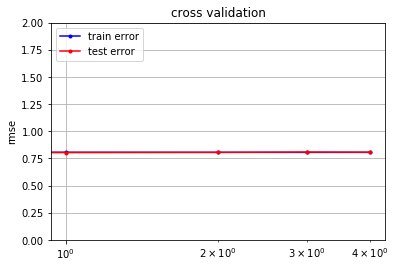

In [21]:
gamma = 0.01
max_iters = 500
cross_validation_demo(y, X, least_squares_GD, initial_w=inital_w, max_iters=max_iters, gamma=gamma)

### 2.2. Linear regression using stochastic gradient descent

IntProgress(value=0, max=30)

REMSE test:  0.8105668995146068
Accuracy:  76.0628


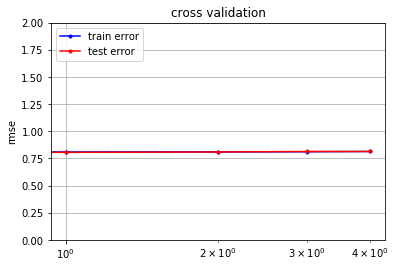

In [22]:
gamma = 0.01
max_iters = 500
cross_validation_demo(y, X, least_squares_SGD, initial_w=inital_w, max_iters=max_iters, gamma=gamma)

### 2.3. Least squares regression using normal equations

IntProgress(value=0, max=30)

REMSE test:  0.798092785153416
Accuracy:  77.5436


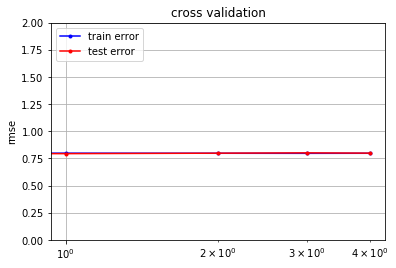

In [23]:
gamma = 0.01
max_iters = 500
cross_validation_demo(y, X, least_squares)

### 2.4. Ridge regression

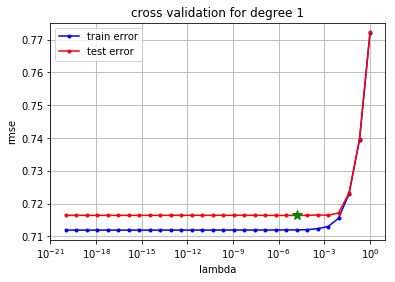

1.4873521072935119e-05 0.7163930957000026
Accuracy:  82.5542988689821
1 1.4873521072935119e-05


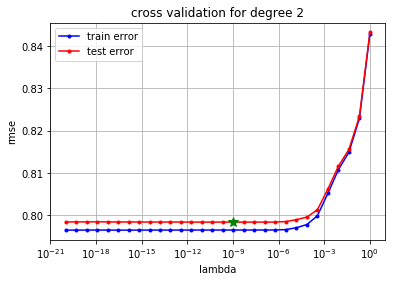

1.0826367338740564e-09 0.7984367049573083


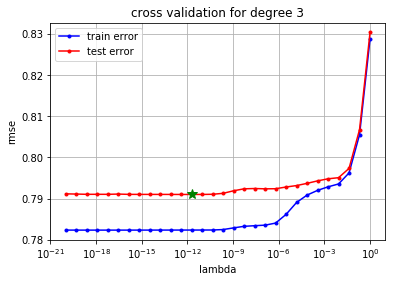

1.8873918221350995e-12 0.7909844812527735


KeyboardInterrupt: 

In [14]:
#best_degree, best_lambda = best_model_ridge(y, X, 5, np.arange(1,11), np.logspace(-5, 0, 30), seed=56)
y, X, X_mean, X_std, ids, dict_mask_jets_train = process_data3('Data/train.csv', inv_log=True)
best_degrees = []
best_lambdas = []
for i in range(0, 1):
    best_degree, best_lambda = best_model_ridge(y[dict_mask_jets_train[i]], X[dict_mask_jets_train[i]], 5, np.arange(1,3), np.logspace(-20, 0, 30), seed=56)
    best_degrees.append(best_degree)
    best_lambdas.append(best_lambda)
    print(best_degree, best_lambda)
for i in range(1,len(dict_mask_jets_train)):
    best_degree, best_lambda = best_model_ridge(y[dict_mask_jets_train[i]], X[dict_mask_jets_train[i]], 5, np.arange(2,7), np.logspace(-20, 0, 30), seed=56)
    best_degrees.append(best_degree)
    best_lambdas.append(best_lambda)
    print(best_degree, best_lambda)

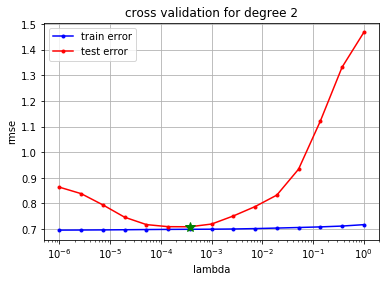

0.0003727593720314938 0.7091359297916928


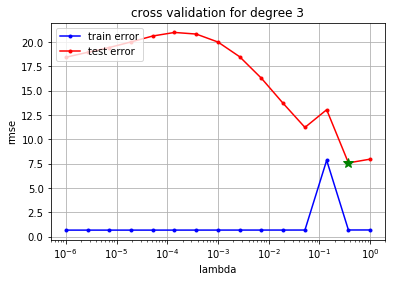

0.3727593720314938 7.589778620113688


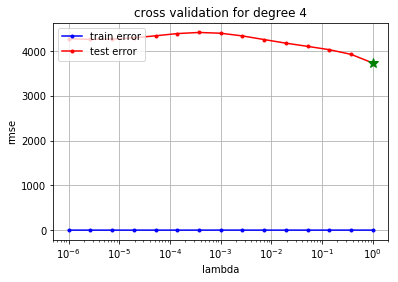

1.0 3730.97696780365
Accuracy:  83.07676909218296
2 0.0003727593720314938


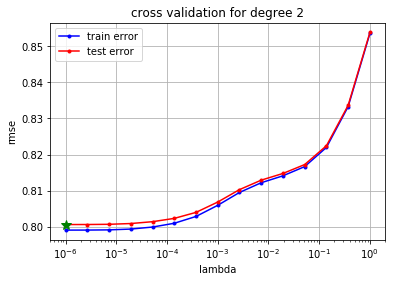

1e-06 0.800620188737188


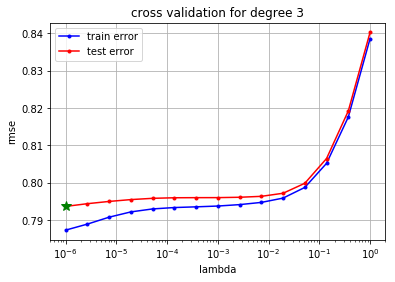

1e-06 0.7936787654937596


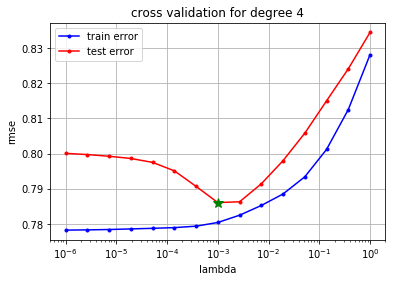

0.001 0.7860577379053793
Accuracy:  79.29713696156821
4 0.001


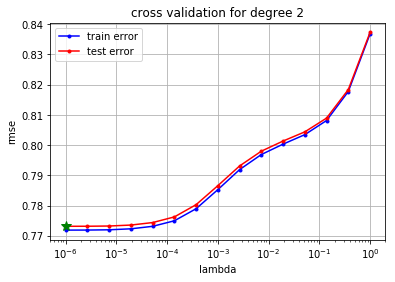

1e-06 0.7731234577694769


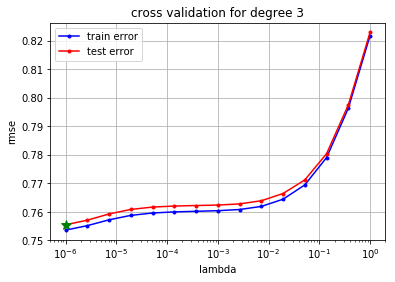

1e-06 0.75548165363626


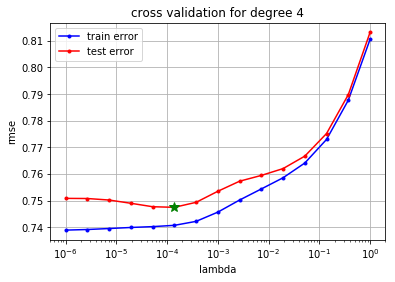

0.00013894954943731373 0.7474489232037509
Accuracy:  82.11883098979874
4 0.00013894954943731373


In [2]:
#best_degree, best_lambda = best_model_ridge(y, X, 5, np.arange(1,11), np.logspace(-5, 0, 30), seed=56)
y, X, dict_mask_jets_train, ids = process_data4('Data/train.csv', inv_log=True)
best_degrees = []
best_lambdas = []
for i in range(len(dict_mask_jets_train)):
    #best_degree, best_lambda = best_model_ridge(y[dict_mask_jets_train[i]], X[i], 5, np.arange(2,6), np.logspace(-10, 0, 15), seed=56)
    best_degree, best_lambda = best_model_ridge(y[dict_mask_jets_train[i]], X[i], 5, np.arange(2,5), np.logspace(-6, 0, 15), seed=56)
    best_degrees.append(best_degree)
    best_lambdas.append(best_lambda)
    print(best_degree, best_lambda)

In [3]:
best_weights = []
for i in range(len(dict_mask_jets_train)):
    xi = X[i]
    yi = y[dict_mask_jets_train[i]]
    
    xi = build_poly(xi, best_degrees[i])
    w, _ = imp.ridge_regression(yi, xi, best_lambdas[i])
    best_weights.append(w)

In [4]:
y, X, dict_mask_jets_train, ids = process_data4('Data/test.csv', inv_log=True)
y_pred = np.zeros(y.shape[0])

for i in range(len(dict_mask_jets_train)):
    xi = X[i]
    xi = build_poly(xi, best_degrees[i])
    y_test_pred = predict_labels(best_weights[i], xi)
    y_pred[dict_mask_jets_train[i]] = y_test_pred
create_csv_submission(ids, y_pred, "prediction_4.csv")

In [5]:
y, X, dict_mask_jets_train, ids = process_data4('Data/train.csv', inv_log=True)
y_pred = np.zeros(y.shape)
    
for i in range(len(dict_mask_jets_train)):
    xi = X[i]
    xi = build_poly(xi, best_degrees[i])
    y_test_pred = predict_labels(best_weights[i], xi)
    y_pred[dict_mask_jets_train[i]] = y_test_pred
accuracy = np.count_nonzero(y == y_pred) / len(y) * 100
print(accuracy)

81.6708


In [22]:
_, X, X_mean, X_std, ids, dict_mask_jets_train = process_data2('Data/test.csv', inv_log=True)
y_pred = np.zeros(X.shape[0])
    
for i in range(len(dict_mask_jets_train)):
    xi = X[dict_mask_jets_train[i]]
    xi = build_poly(xi, best_degrees[i])
    y_test_pred = predict_labels(best_weights[i], xi)
    y_pred[dict_mask_jets_train[i]] = y_test_pred
create_csv_submission(ids, y_pred, "prediction_3.csv")

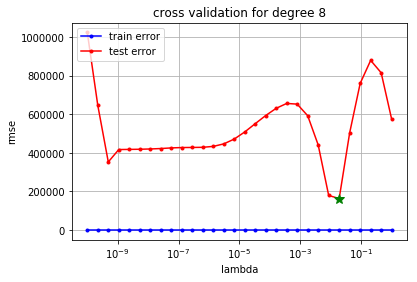

0.018873918221350997 163416.512541823


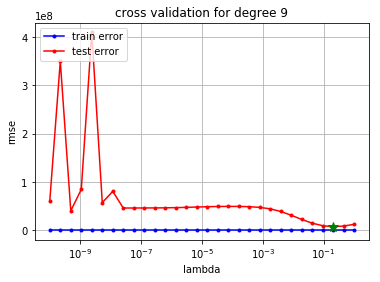

0.2043359717856948 7047868.487886092


KeyboardInterrupt: 

In [14]:
best_degree, best_lambda = best_model_ridge(y, X, 5, np.arange(8,11), np.logspace(-10, 0, 30), seed=56)
best_degree, best_lambda

### 2.5. Logistic regression using gradient descent

NameError: name 'x' is not defined

### 2.6. Regularized logistic regression using gradient descent

IntProgress(value=0, max=5)

DEGREE 2 lambda 0.25 accuracy 0.80358
DEGREE 2 lambda 0.25 accuracy 0.79988
DEGREE 2 lambda 0.25 accuracy 0.78318
DEGREE 2 lambda 0.25 accuracy 0.79878
DEGREE 2 lambda 0.25 accuracy 0.78952


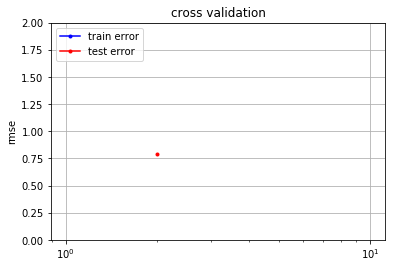

In [5]:
y = np.where(y==-1,0,y)
min_tr, min_te, w = cross_validation_logistic_demo(y,X,0.25)

## 3. Conclusion and choice of the best model